https://drive.google.com/file/d/12Ybs_oNNteIJkvaKNkO0IcnE7SFKQzys/view?usp=sharing

In [1]:
!gdown --id 12Ybs_oNNteIJkvaKNkO0IcnE7SFKQzys


/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=12Ybs_oNNteIJkvaKNkO0IcnE7SFKQzys
To: /content/analyst_test_transactions.csv
100% 3.07M/3.07M [00:00<00:00, 188MB/s]


In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('analyst_test_transactions.csv')

In [4]:
df.head()

,user_id,order_id,reg_date,transaction_date,revenue
0,57562,94545.0,2013-12-22,2015-07-16,1088
1,40047,81824.0,2013-11-24,2015-01-19,1027
2,48153,144851.0,2015-07-03,2015-10-29,601
3,54591,116111.0,2013-07-12,2015-04-30,881
4,39789,134943.0,2013-05-25,2015-07-21,984


In [5]:
len(df)

76857

In [6]:
df['reg_date'].agg(['min','max'])

min    1900-01-01
max    2015-11-20
Name: reg_date, dtype: object

In [7]:
df.dtypes

user_id               int64
order_id            float64
reg_date             object
transaction_date     object
revenue               int64
dtype: object

In [8]:
df['reg_date'] = pd.to_datetime(df['reg_date'],format='%Y-%m-%d')
df['transaction_date'] = pd.to_datetime(df['transaction_date'],format='%Y-%m-%d')

In [9]:
df['reg_date'].agg(['min','max'])

min   1900-01-01
max   2015-11-20
Name: reg_date, dtype: datetime64[ns]

In [10]:
df['reg_month'] = df['reg_date'].astype('datetime64[M]')

In [11]:
df.groupby(['reg_month'])['user_id'].agg(['count','nunique'])

,count,nunique
reg_month,,
1900-01-01,53,53
2012-02-24,2,2
2012-02-27,3,3
2012-02-29,4,4
2012-03-01,25,25
...,...,...
2015-11-16,34,34
2015-11-17,22,22
2015-11-18,28,28


In [12]:
df['transaction_month'] = df['transaction_date'].astype('datetime64[M]')

In [13]:
df.groupby(['transaction_month'])['user_id'].agg(['count','nunique'])

,count,nunique
transaction_month,,
2015-01-01,138,138
2015-01-02,97,97
2015-01-03,118,118
2015-01-04,106,106
2015-01-05,103,103
...,...,...
2015-11-16,362,360
2015-11-17,341,341
2015-11-18,375,374


In [14]:
df['user_id'].nunique()

48214

In [15]:
len(df.groupby(['reg_month'])['user_id'].agg(['count','nunique']))

1363

In [16]:
48214 * 47

2266058

<Axes: >

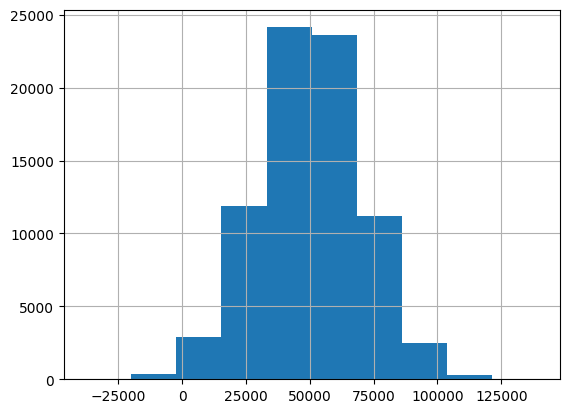

In [17]:
df['user_id'].hist()

In [18]:
df[df['user_id']<0]

,user_id,order_id,reg_date,transaction_date,revenue,reg_month,transaction_month
117,-7670,84002.0,2015-02-09,2015-02-22,808,2015-02-09,2015-02-22
144,-4741,141322.0,2015-06-15,2015-10-07,728,2015-06-15,2015-10-07
339,-16994,22456.0,2015-06-13,2015-07-25,878,2015-06-13,2015-07-25
380,-6927,157109.0,2015-02-07,2015-06-12,727,2015-02-07,2015-06-12
503,-5446,74254.0,2014-08-08,2015-03-05,711,2014-08-08,2015-03-05
...,...,...,...,...,...,...,...
76104,-10718,85345.0,2014-09-12,2015-09-25,783,2014-09-12,2015-09-25
76133,-2931,137163.0,2014-11-30,2015-05-13,952,2014-11-30,2015-05-13
76302,-2156,78342.0,2014-09-15,2015-03-11,834,2014-09-15,2015-03-11
76585,-5397,30581.0,2012-03-11,2015-11-20,1054,2012-03-11,2015-11-20


<Axes: >

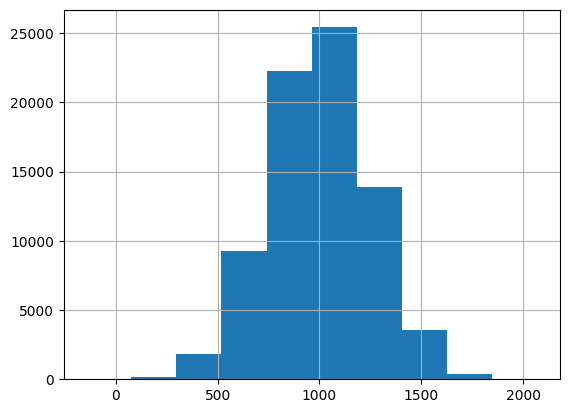

In [19]:
df['revenue'].hist()

<Axes: >

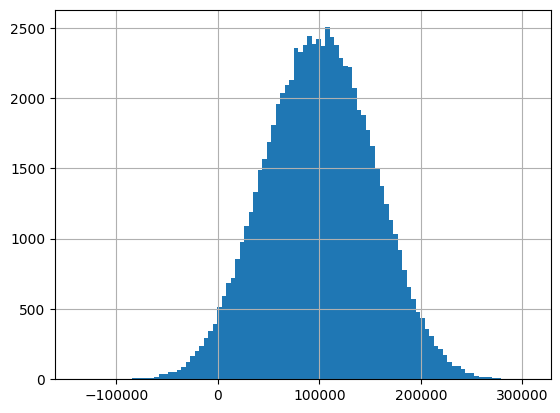

In [20]:
df['order_id'].hist(bins=100)

In [21]:
user = df.groupby('user_id')['reg_month'].min().reset_index()

In [22]:
user

,user_id,reg_month
0,-37599,2015-01-19
1,-32239,2015-11-05
2,-29822,2015-07-31
3,-29531,2014-09-07
4,-25337,2015-04-10
...,...,...
48209,128964,2015-10-18
48210,130617,2015-02-04
48211,131071,2012-04-18
48212,132484,2015-06-12


In [23]:
len(df.groupby(['transaction_month'])['user_id'].agg(['count','nunique']))

324

In [24]:
min_date = df['transaction_month'].min()
max_date = df['transaction_month'].max()

In [25]:
month = pd.DataFrame(pd.date_range(min_date,max_date,freq='MS'))

In [26]:
month.columns = ['month']

In [27]:
user['key'] = 1
month['key'] = 1

In [28]:
template = user.merge(month,on='key')[['user_id','reg_month','month']]

In [29]:
len(template)

530354

In [30]:
template = template[template['month'] >= template['reg_month']]

In [31]:
template

,user_id,reg_month,month
1,-37599,2015-01-19,2015-02-01
2,-37599,2015-01-19,2015-03-01
3,-37599,2015-01-19,2015-04-01
4,-37599,2015-01-19,2015-05-01
5,-37599,2015-01-19,2015-06-01
...,...,...,...
530349,138987,2014-10-29,2015-07-01
530350,138987,2014-10-29,2015-08-01
530351,138987,2014-10-29,2015-09-01
530352,138987,2014-10-29,2015-10-01


In [32]:
trans_month = df.groupby(['user_id','transaction_month'])['revenue'].sum().reset_index()

In [33]:
trans_month.columns = ['user_id','month','revenue']

In [41]:
report = template.merge(trans_month,on=['user_id','month'],how='left')

In [45]:
report['active'] = (report['revenue'] > 0)*1

In [46]:
report.pivot_table(index='reg_month',columns='month',values='active',aggfunc='count')

month,2015-01-01,2015-02-01,2015-03-01,2015-04-01,2015-05-01,2015-06-01,2015-07-01,2015-08-01,2015-09-01,2015-10-01,2015-11-01
reg_month,,,,,,,,,,,
1900-01-01,53.0,53.0,53.0,53.0,53.0,53.0,53.0,53.0,53.0,53.0,53.0
2012-02-24,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
2012-02-27,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
2012-02-29,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
2012-03-01,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0
...,...,...,...,...,...,...,...,...,...,...,...
2015-10-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.0
2015-10-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.0
2015-10-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.0


In [47]:
report.pivot_table(index='reg_month',columns='month',values='active',aggfunc='sum')

month,2015-01-01,2015-02-01,2015-03-01,2015-04-01,2015-05-01,2015-06-01,2015-07-01,2015-08-01,2015-09-01,2015-10-01,2015-11-01
reg_month,,,,,,,,,,,
1900-01-01,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
2012-02-24,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2012-02-27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2012-02-29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2012-03-01,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2015-10-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2015-10-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
2015-10-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0


In [48]:
retention = report.pivot_table(index='reg_month',columns='month',values='active',aggfunc='mean')

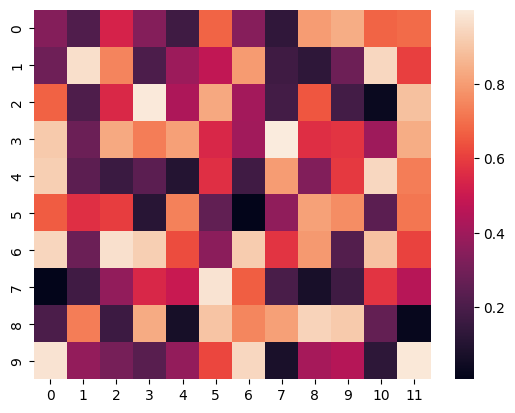

In [49]:
import numpy as np
import seaborn as sns
uniform_data = np.random.rand(10, 12)
ax = sns.heatmap(uniform_data)

In [50]:
sns.set(font_scale=2,style="whitegrid",rc={'figure.figsize':(12,6)} )

<Axes: xlabel='month', ylabel='reg_month'>

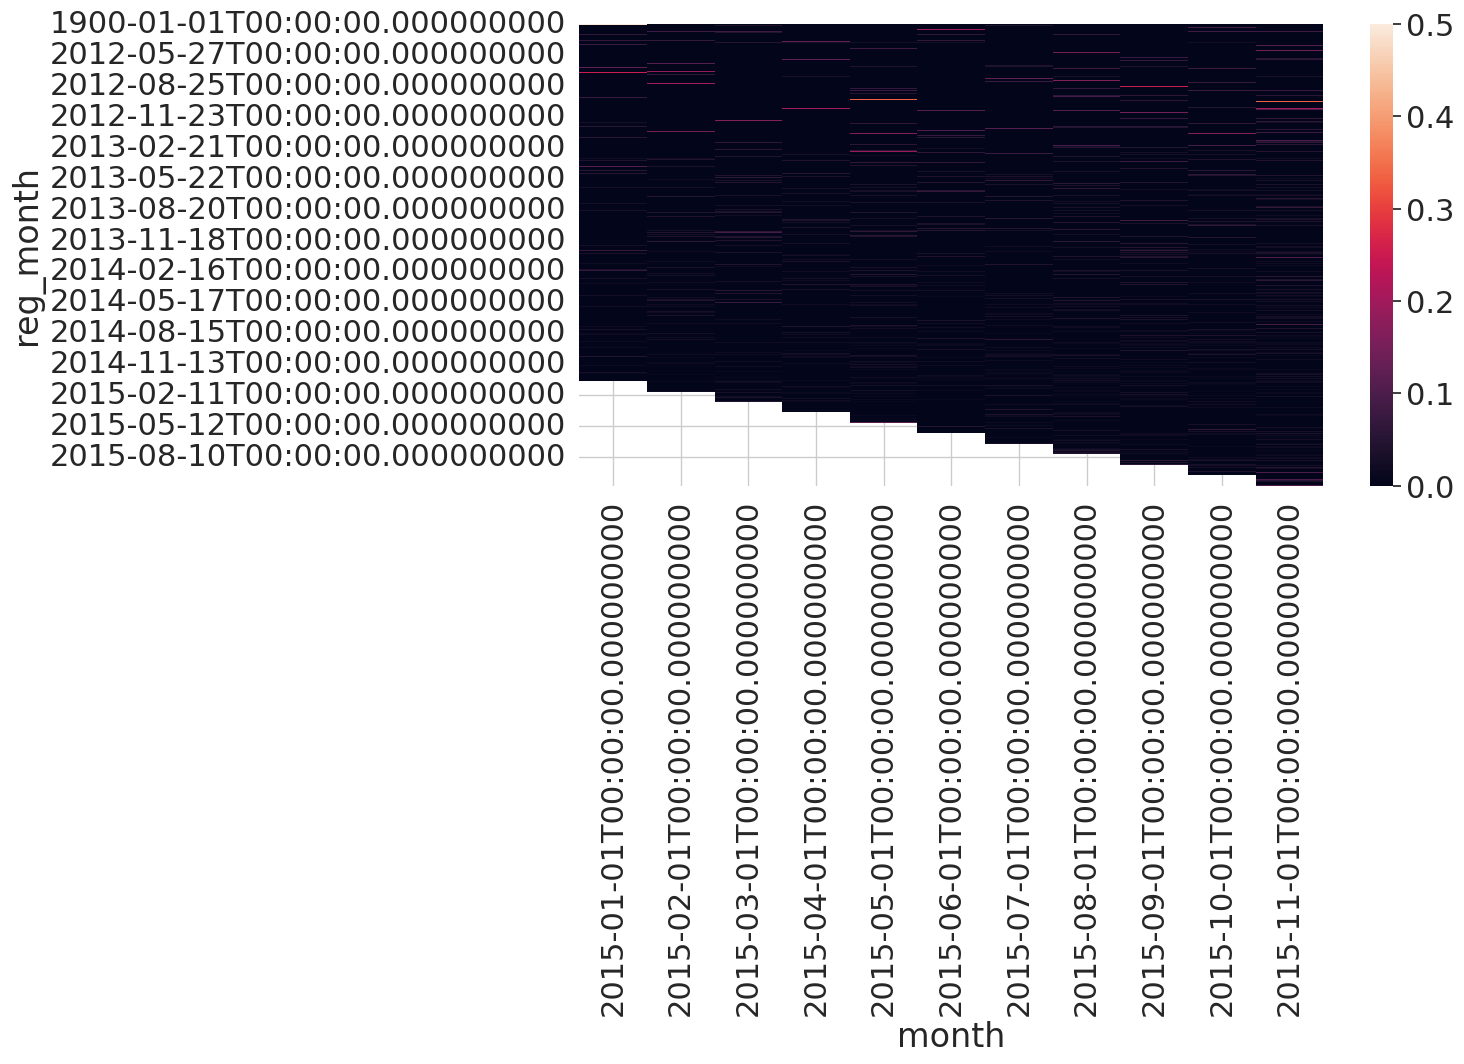

In [51]:
sns.heatmap(retention)

In [52]:
retention

month,2015-01-01,2015-02-01,2015-03-01,2015-04-01,2015-05-01,2015-06-01,2015-07-01,2015-08-01,2015-09-01,2015-10-01,2015-11-01
reg_month,,,,,,,,,,,
1900-01-01,0.018868,0.0,0.018868,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.037736
2012-02-24,0.500000,0.0,0.000000,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.000000
2012-02-27,0.000000,0.0,0.000000,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.000000
2012-02-29,0.000000,0.0,0.000000,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.000000
2012-03-01,0.000000,0.0,0.040000,0.0,0.0,0.0,0.04,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
2015-10-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
2015-10-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.105263
2015-10-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.083333


In [53]:
report['lifetime'] = ((report['month'] - report['reg_month'])/np.timedelta64(1, 'M')).round().astype(int)

In [54]:
report[report['user_id'] == 128006]

,user_id,reg_month,month,revenue,active,lifetime
452282,128006,2015-01-25,2015-02-01,NaN,0,0
452283,128006,2015-01-25,2015-03-01,NaN,0,1
452284,128006,2015-01-25,2015-04-01,NaN,0,2
452285,128006,2015-01-25,2015-05-01,NaN,0,3
452286,128006,2015-01-25,2015-06-01,NaN,0,4
452287,128006,2015-01-25,2015-07-01,NaN,0,5
452288,128006,2015-01-25,2015-08-01,NaN,0,6
452289,128006,2015-01-25,2015-09-01,NaN,0,7
452290,128006,2015-01-25,2015-10-01,NaN,0,8
452291,128006,2015-01-25,2015-11-01,NaN,0,9


In [55]:
report['reg_month_str'] = report['reg_month'].dt.strftime('%Y-%m')

In [56]:
retention = report[report['reg_month'] >= '2015-01-01'].pivot_table(index='reg_month',columns='lifetime',values='active',aggfunc='mean')

In [57]:
retention

lifetime,0,1,2,3,4,5,6,7,8,9,10
reg_month,,,,,,,,,,,
2015-01-01,0.084906,0.0000,0.000000,0.0,0.018868,0.0,0.000000,0.018868,0.0000,0.028302,0.009434
2015-01-02,NaN,0.0125,0.025000,0.0,0.000000,0.0,0.000000,0.000000,0.0125,0.000000,0.025000
2015-01-03,NaN,0.0000,0.000000,0.0,0.000000,0.0,0.017241,0.000000,0.0000,0.000000,0.017241
2015-01-04,NaN,0.0000,0.015385,0.0,0.000000,0.0,0.000000,0.015385,0.0000,0.000000,0.000000
2015-01-05,NaN,0.0000,0.016667,0.0,0.016667,0.0,0.000000,0.016667,0.0000,0.016667,0.016667
...,...,...,...,...,...,...,...,...,...,...,...
2015-10-28,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-10-29,0.105263,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-10-30,0.083333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: xlabel='lifetime', ylabel='reg_month'>

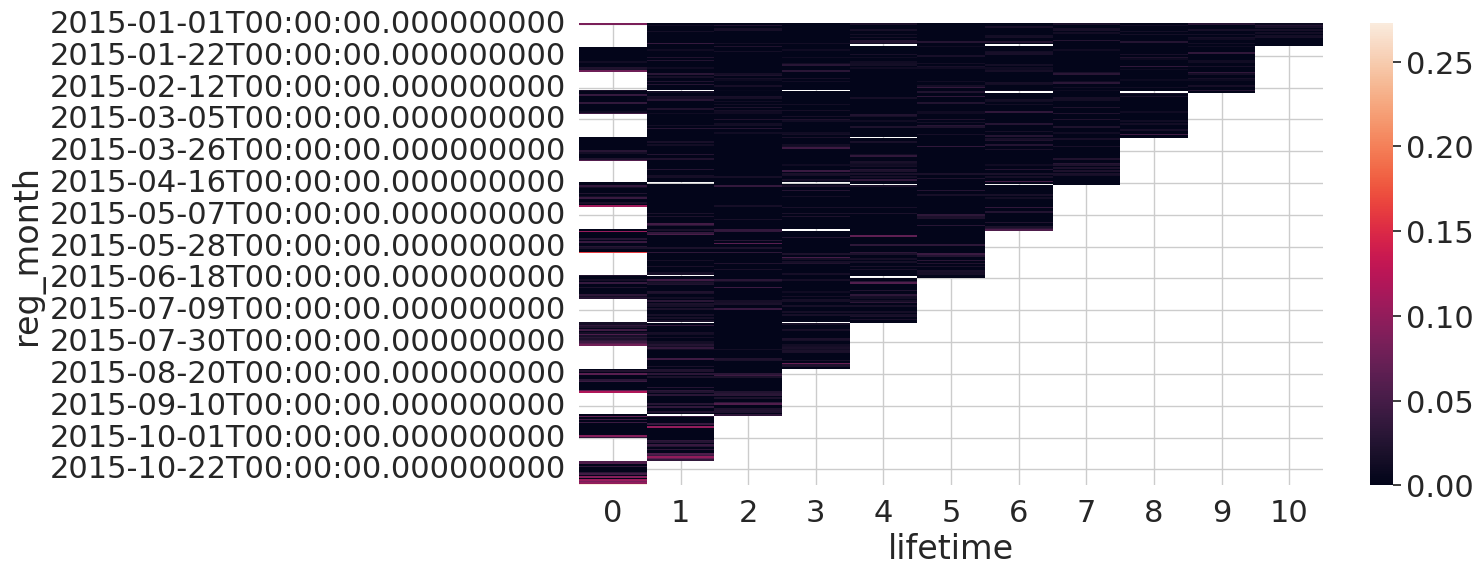

In [58]:
sns.heatmap(retention)